In [1]:
import glob
import numpy as np
import cv2
import scipy.io
import matplotlib.pyplot as plt

In [2]:

for x in sorted(glob.glob('./Aki/LeftPawManual*.mat')):
    print(x)

./Aki/LeftPawManual_MD001_170713.mat
./Aki/LeftPawManual_MD001_170723.mat
./Aki/LeftPawManual_MD001_170724_rec1.mat
./Aki/LeftPawManual_MD002_170713_rec2.mat
./Aki/LeftPawManual_MD009_170808.mat
./Aki/LeftPawManual_MD010_170808.mat


In [3]:

fn_mat = './Aki/LeftPawManual_MD001_170713.mat'
fn_bin = fn_mat[:-3]+'bin'
fn_avi = './Aki/'+fn_mat[20:-3]+'avi'
print(fn_avi)

cap = cv2.VideoCapture(fn)
ret, frame = cap.read()
cap.release()


./Aki/MD001_170713.avi


NameError: name 'fn' is not defined

In [19]:
mat = scipy.io.loadmat(fn_mat)


{'CurrentFrame': array([[5640]], dtype=uint16),
 'ElapsedTime': array([], shape=(0, 0), dtype=uint8),
 'HeadPlatePosition': array([[ 225.72254902,   16.49705882]]),
 'Left_Paw': array([[ 285.83235294,   99.14803922],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        ..., 
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ]]),
 'Left_Paw_Mirror': array([[ 232.29705882,  358.37156863],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        ..., 
        [   0.        ,    0.        ],
        [   0.        ,    0.        ],
        [   0.        ,    0.        ]]),
 '__globals__': ['CurrentFrame',
  'ElapsedTime',
  'Left_Paw',
  'Left_Paw_Mirror',
  'HeadPlatePosition'],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jan 04 12:59:46 2018',
 '__version__': '1.0'}

In [49]:
headplate_x = np.round(mat['HeadPlatePosition']).astype(np.int)[0][0]
headplate_y = np.round(mat['HeadPlatePosition']).astype(np.int)[0][1]
# [y, x] in np.array
print((headplate_x, headplate_y))

(226, 16)


In [47]:
print(np.max(mat['Left_Paw'][mat['Left_Paw'][:,0]>0,:],axis=0))
print(np.min(mat['Left_Paw'][mat['Left_Paw'][:,0]>0,:],axis=0))

[ 425.7754902   146.10882353]
[ 229.47941176   69.09313725]


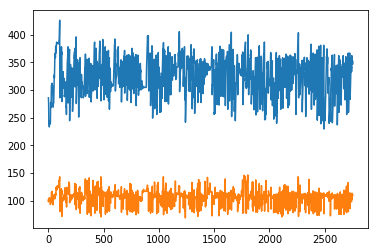

In [58]:
plt.plot(mat['Left_Paw'][mat['Left_Paw'][:,0]>0,:])

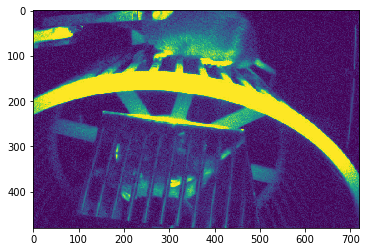

In [59]:

plt.imshow(frame[:,:,0])
plt.show()

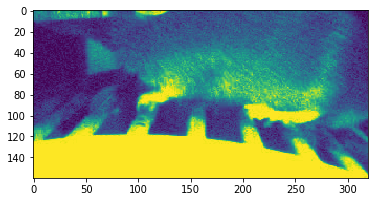

(166, 486)
(16, 176)


In [60]:
offset_x = 100
offset_y = 80
center_x = headplate_x+offset_x
center_y = headplate_y+offset_y
size_x = 320
size_y = 160
plt.imshow(frame[center_y-size_y//2:center_y+size_y//2,center_x-size_x//2:center_x+size_x//2,0])
plt.show()
print((center_x-size_x//2,center_x+size_x//2))
print((center_y-size_y//2,center_y+size_y//2))

In [12]:
with open(fn_bin, 'bw') as f:
    cap = cv2.VideoCapture(fn)
    while(true):
        ret, frame = cap.read()
        if(!ret):
            break
        im = frame[center_y-size_y//2:center_y+size_y//2,center_x-size_x//2:center_x+size_x//2,0]
        f.write(im.tobytes())
    cap.release()

False

In [70]:
len(frame.tobytes())/720/480/3

1.0